In [ ]:
!pip install mediapipe opencv-python matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is inco

In [ ]:
# Fix binary compatibility in Colab
!pip uninstall -y numpy
!pip install numpy==1.23.5 --force-reinstall
#!pip install --upgrade --force-reinstall opencv-python mediapipe matplotlib


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blo

In [ ]:
!pip install --upgrade --force-reinstall opencv-python mediapipe matplotlib

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.2 MB/s eta 0:00:00
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objs as go
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Extract 3D normalized coordinates
    xs, ys, zs = [], [], []
    for lm in face_landmarks.landmark:
        xs.append(lm.x)
        ys.append(lm.y)
        zs.append(-lm.z)  # Flip Z for natural depth perception

    # Convert to numpy arrays and scale
    xs = np.array(xs) * w
    ys = np.array(ys) * h
    zs = np.array(zs) * w  # Optional scaling for depth

    # Save Nx2 (x, y) coordinates to file
    landmarks_2d = np.stack((xs, ys), axis=1)
    np.savetxt("face_landmarks_2d.txt", landmarks_2d, fmt="%.2f", delimiter=",", header="x,y", comments='')

    print("2D facial landmarks saved to face_landmarks_2d.txt")

    # Plot interactive 3D scatter with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=2, color='green'),
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            yaxis=dict(autorange='reversed')  # Flip Y to match image
        ),
        title="Interactive 3D Face Landmarks",
        width=700,
        height=700
    )
    fig.show()
else:
    print("No face landmarks detected.")


Saving ganesh1-removebg-preview.png to ganesh1-removebg-preview.png
2D facial landmarks saved to face_landmarks_2d.txt


In [ ]:
import numpy as np
import h5py
import cv2
import json
from scipy.optimize import least_squares
from scipy.spatial import cKDTree

from scipy.spatial import cKDTree

from scipy.spatial import cKDTree

def load_3dmm_model(h5_path, num_shape_coeffs=80):
    with h5py.File(h5_path, 'r') as f:
        mean = f['shape/model/mean'][:]                          # (3N,)
        basis = f['shape/model/pcaBasis'][:, :num_shape_coeffs] # (3N, k)
        variance = f['shape/model/pcaVariance'][:num_shape_coeffs]  # (k,)
        raw_points = f['shape/representer/points'][:]            # (3, N)
        faces = f['shape/representer/cells'][:]                  # (F, 3)

        # Fix shape for raw_points (should be (N, 3))
        points = raw_points.T  # Transpose from (3, N) to (N, 3)
        print("Points shape (vertices):", points.shape)

        # Decode landmark JSON
        landmark_json = f['metadata/landmarks/json'][()]
        if isinstance(landmark_json, np.ndarray):
            landmark_json = b"".join(landmark_json).decode("utf-8")
        else:
            landmark_json = landmark_json.decode("utf-8")
        landmark_data = json.loads(landmark_json)

        # Get 3D coordinates for landmarks
        landmark_coords = np.array([entry["coordinates"] for entry in landmark_data])
        print("Landmark coords shape:", landmark_coords.shape)

        # Nearest neighbor matching
        kdtree = cKDTree(points)
        _, landmark_vertex_ids = kdtree.query(landmark_coords)

    mean = mean.reshape(-1, 3)  # Ensure mean is in the right shape
    return mean, basis, variance, points, faces, np.array(landmark_vertex_ids)




def load_2d_landmarks(path):
    return np.loadtxt(path)  # Nx2

def project(shape_3d, R, t, s):
    return s * (R @ shape_3d.T).T[:, :2] + t  # Weak perspective

def fit_3d_shape(mean, pca_basis, landmarks_2d, landmark_ids, num_coeffs=80):
    shape_mean = mean[landmark_ids]                        # (N_lmks, 3)
    basis = pca_basis.reshape(-1, 3, num_coeffs)           # (N, 3, k)
    shape_basis = basis[landmark_ids]                      # (N_lmks, 3, k)

    def residuals(params):
        c = params[:num_coeffs]
        rvec = params[num_coeffs:num_coeffs+3]
        t = params[num_coeffs+3:num_coeffs+5]
        s = params[num_coeffs+5]

        R, _ = cv2.Rodrigues(rvec)
        shape = shape_mean + np.tensordot(shape_basis, c, axes=(2, 0))
        proj = project(shape, R, t, s)
        return (proj - landmarks_2d).ravel()

    x0 = np.zeros(num_coeffs + 6)
    x0[num_coeffs+5] = 1.0  # initial scale

    result = least_squares(residuals, x0, verbose=2)
    c_final = result.x[:num_coeffs]
    rvec = result.x[num_coeffs:num_coeffs+3]
    t = result.x[num_coeffs+3:num_coeffs+5]
    s = result.x[num_coeffs+5]
    R, _ = cv2.Rodrigues(rvec)

    full_shape = mean + np.tensordot(
        pca_basis[:, :num_coeffs], c_final, axes=(1, 0)
    ).reshape(-1, 3)

    return full_shape, c_final, R, t, s

def save_obj(filename, vertices, faces):
    with open(filename, 'w') as f:
        for v in vertices:
            f.write(f"v {v[0]} {v[1]} {v[2]}\n")
        for face in faces:
            f.write(f"f {face[0]+1} {face[1]+1} {face[2]+1}\n")

# === Example usage ===
if __name__ == "__main__":
    h5_file = "/content/model2019_bfm.h5"
    landmark_path = "/content/face_landmarks_2d.txt"  # Nx2

    mean, pca_basis, variance, points, faces, landmark_ids = load_3dmm_model(h5_file)
    landmarks_2d = load_2d_landmarks(landmark_path)

    shape_3d, coeffs, R, t, s = fit_3d_shape(mean, pca_basis, landmarks_2d, landmark_ids)
    save_obj("fitted_face.obj", shape_3d, faces)


Points shape (vertices): (47439, 3)
Landmark coords shape: (60, 3)


ValueError: could not convert string 'x,y' to float64 at row 0, column 1.

In [ ]:
import numpy as np

# Define the loader function
def load_2d_landmarks(file_path):
    """
    Load 2D landmarks from a CSV-style text file with x,y values.
    """
    return np.loadtxt(file_path, delimiter=",", skiprows=1)

# === Load landmarks from your .txt file ===
landmarks = load_2d_landmarks("/content/face_landmarks_2d.txt")

# === Save as .npy file ===
np.save("/content/face_landmarks_2d.npy", landmarks)

# === Optional: Print confirmation ===
print("✅ Landmarks shape:", landmarks.shape)
print("✅ Saved to /content/face_landmarks_2d.npy")


✅ Landmarks shape: (468, 2)
✅ Saved to /content/face_landmarks_2d.npy


In [ ]:
import numpy as np

def load_2d_landmarks(file_path):
    landmarks = []
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if ',' in line:
                parts = line.split(',')
                if len(parts) != 2:
                    print(f"Skipping malformed line: {line}")
                    continue
                try:
                    x, y = map(float, parts)
                    landmarks.append([x, y])
                except ValueError as e:
                    print(f"Skipping invalid line: {line} -> {e}")
            else:
                print(f"Skipping invalid line (no comma): {line}")
    return np.array(landmarks)
landmarks = load_2d_landmarks("/content/face_landmarks_2d.txt")


In [ ]:
import numpy as np

def load_2d_landmarks(file_path):
    landmarks = []
    with open(file_path, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            if ',' in line:
                try:
                    x, y = map(float, line.split(','))  # Convert to float
                    landmarks.append([x, y])
                except ValueError as e:
                    print(f"Error parsing line: {line} -> {e}")
            else:
                print(f"Skipping invalid line: {line}")
    return np.array(landmarks)
load_2d_landmarks("/content/face_landmarks_2d.txt")

Error parsing line: x,y -> could not convert string to float: 'x'


array([[657.84, 550.66],
       [655.13, 505.21],
       [656.17, 520.95],
       [641.64, 452.36],
       [654.52, 488.29],
       [654.02, 466.69],
       [653.4 , 416.38],
       [548.48, 417.67],
       [652.32, 379.7 ],
       [651.52, 358.24],
       [649.54, 279.06],
       [658.3 , 557.84],
       [658.7 , 562.68],
       [659.05, 564.09],
       [659.74, 566.9 ],
       [660.02, 571.99],
       [660.29, 578.96],
       [660.68, 587.44],
       [661.25, 604.42],
       [655.5 , 513.81],
       [642.66, 512.65],
       [496.5 , 361.32],
       [590.91, 430.64],
       [576.09, 431.93],
       [562.19, 431.14],
       [543.57, 423.86],
       [603.49, 426.57],
       [571.36, 394.18],
       [586.59, 394.64],
       [557.07, 396.61],
       [547.48, 401.8 ],
       [531.96, 433.64],
       [608.27, 634.73],
       [543.73, 414.49],
       [491.71, 429.67],
       [515.96, 424.61],
       [581.36, 492.07],
       [638.88, 548.58],
       [641.74, 562.45],
       [619.62, 552.7 ],


Facial landmark points ploted on the image code ---------------------------------------

Saving gargeyaBlend.jpg to gargeyaBlend (2).jpg


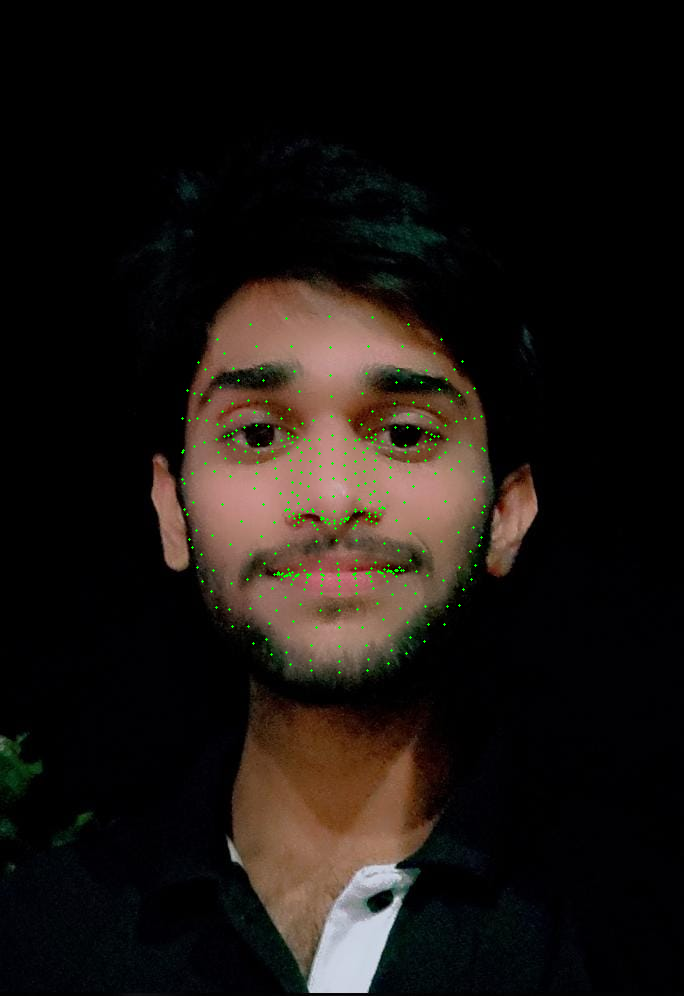

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and process image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for lm in face_landmarks.landmark:
            x = int(lm.x * image.shape[1])
            y = int(lm.y * image.shape[0])
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

    # Show result in Colab
    cv2_imshow(image)
else:
    print("No face landmarks detected.")


Saving GarFrontBlend3.jpg to GarFrontBlend3.jpg


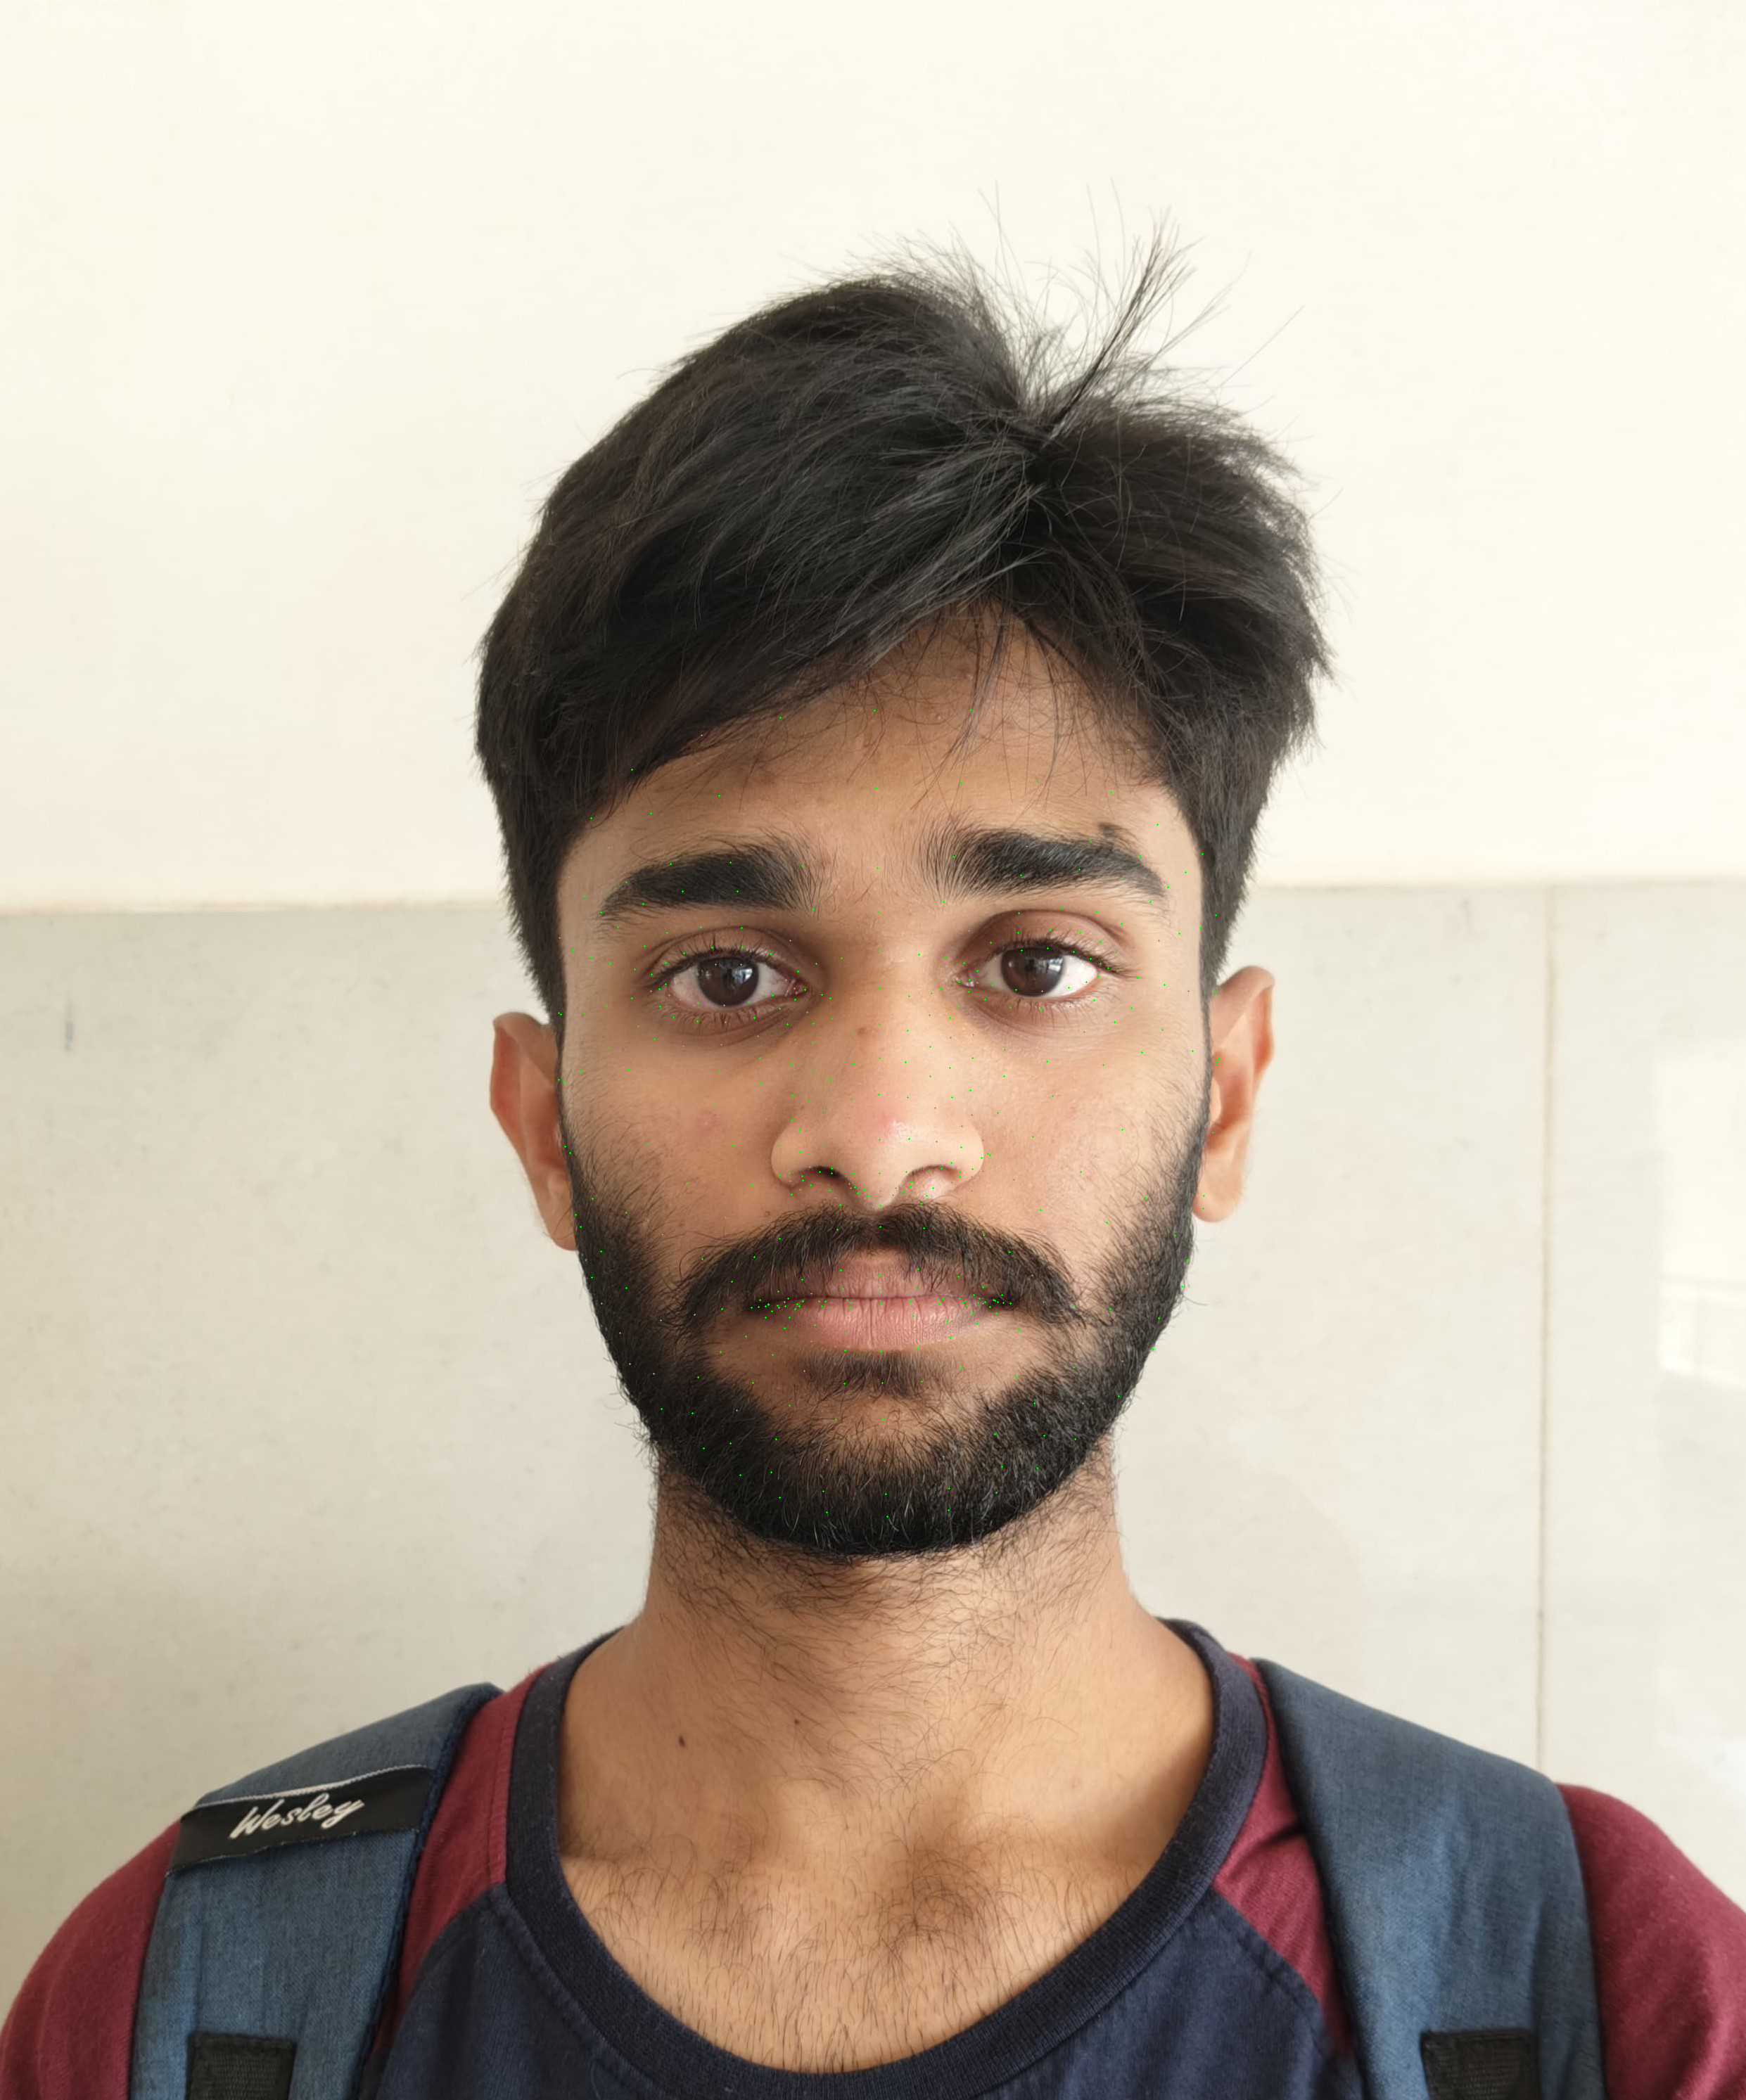

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and process image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for lm in face_landmarks.landmark:
            x = int(lm.x * image.shape[1])
            y = int(lm.y * image.shape[0])
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

    # Show result in Colab
    cv2_imshow(image)
else:
    print("No face landmarks detected.")


Saving JayFrontBlend.jpg to JayFrontBlend (2).jpg


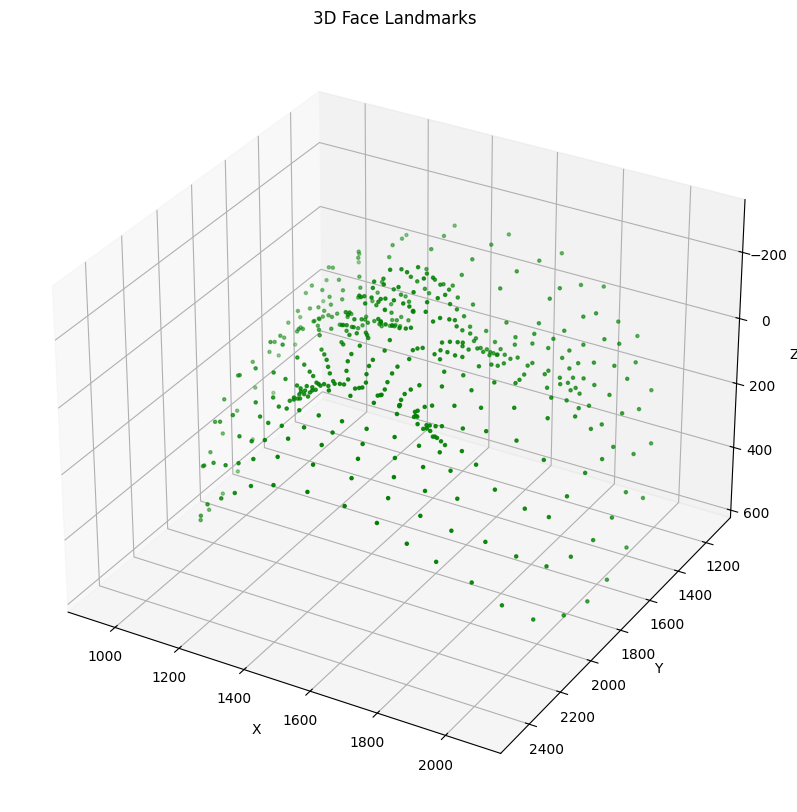

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and convert to RGB
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process the image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Get image dimensions
    h, w, _ = image.shape

    # Extract 3D landmark coordinates
    landmarks_3d = np.array([
        [lm.x * w, lm.y * h, lm.z * w] for lm in face_landmarks.landmark
    ])

    # Plot in 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    xs, ys, zs = landmarks_3d[:, 0], landmarks_3d[:, 1], landmarks_3d[:, 2]
    ax.scatter(xs, ys, zs, c='green', marker='o', s=5)

    # Invert Y-axis to match image coordinates
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim()[::-1])  # Flip Y
    ax.set_zlim(ax.get_zlim()[::-1])  # Flip Z for a better perspective

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title("3D Face Landmarks")
    plt.show()
else:
    print("No face landmarks detected.")


Facial Landmark detector ploted in a 3D plane code --------------------------------------------

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objs as go
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Extract 3D normalized coordinates
    xs, ys, zs = [], [], []
    for lm in face_landmarks.landmark:
        xs.append(lm.x)
        ys.append(lm.y)
        zs.append(-lm.z)  # Flip Z for natural depth perception

    # Convert to numpy arrays and scale
    xs = np.array(xs) * w
    ys = np.array(ys) * h
    zs = np.array(zs) * w  # Optional scaling for depth

    # Plot interactive 3D scatter with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=2, color='green'),
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            yaxis=dict(autorange='reversed')  # Flip Y to match image
        ),
        title="Interactive 3D Face Landmarks",
        width=700,
        height=700
    )
    fig.show()
else:
    print("No face landmarks detected.")


Saving JayFrontBlend.jpg to JayFrontBlend (3).jpg


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objs as go
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Extract 3D normalized coordinates
    xs, ys, zs = [], [], []
    for lm in face_landmarks.landmark:
        xs.append(lm.x)
        ys.append(lm.y)
        zs.append(-lm.z)  # Flip Z for natural depth perception

    # Convert to numpy arrays and scale
    xs = np.array(xs) * w
    ys = np.array(ys) * h
    zs = np.array(zs) * w  # Optional scaling for depth

    # Plot interactive 3D scatter with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=2, color='green'),
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            yaxis=dict(autorange='reversed')  # Flip Y to match image
        ),
        title="Interactive 3D Face Landmarks",
        width=700,
        height=700
    )
    fig.show()
else:
    print("No face landmarks detected.")


Saving gargeyaBlend.jpg to gargeyaBlend (1).jpg


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objs as go
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Extract 3D normalized coordinates
    xs, ys, zs = [], [], []
    for lm in face_landmarks.landmark:
        xs.append(lm.x)
        ys.append(lm.y)
        zs.append(-lm.z)  # Flip Z for natural depth perception

    # Convert to numpy arrays and scale
    xs = np.array(xs) * w
    ys = np.array(ys) * h
    zs = np.array(zs) * w  # Optional scaling for depth

    # Save Nx2 (x, y) coordinates to file
    landmarks_2d = np.stack((xs, ys), axis=1)
    np.savetxt("face_landmarks_2d_gane.txt", landmarks_2d, fmt="%.2f", delimiter=",", header="x,y", comments='')

    # Save Nx3 (x, y, z) coordinates to file
    landmarks_3d = np.stack((xs, ys, zs), axis=1)
    np.savetxt("face_landmarks_3d_gane.txt", landmarks_3d, fmt="%.2f", delimiter=",", header="x,y,z", comments='')

    print("2D facial landmarks saved to face_landmarks_2d_sou.txt")
    print("3D facial landmarks saved to face_landmarks_3d_sou.txt")

    # Plot interactive 3D scatter with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=2, color='green'),
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            yaxis=dict(autorange='reversed')  # Flip Y to match image
        ),
        title="Interactive 3D Face Landmarks",
        width=700,
        height=700
    )
    fig.show()
else:
    print("No face landmarks detected.")


Saving ganesh1.jpg to ganesh1.jpg
2D facial landmarks saved to face_landmarks_2d_sou.txt
3D facial landmarks saved to face_landmarks_3d_sou.txt


In [ ]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  At

In [ ]:
import open3d as o3d
import numpy as np
import mediapipe as mp

def create_face_mesh_from_path(points_file_path, scale_factor=1.0):
    """
    Creates a 3D face mesh from landmark points provided in a local file,
    scaling the points before reconstruction.

    Args:
        points_file_path (str): Path to the local file containing landmark points
                                 (comma-separated x,y,z values, with a header).
        scale_factor (float): Factor by which to scale the point coordinates.
                             Default is 1.0 (no scaling).
    """
    try:
        points_array = np.loadtxt(points_file_path, delimiter=',', skiprows=1)
    except FileNotFoundError:
        print(f"Error: File not found at path: {points_file_path}")
        return
    except Exception as e:
        print(f"Error loading data from file: {e}")
        return

    # Scale the points
    points_array_scaled = points_array * scale_factor

    # Ensure we have enough points (MediaPipe has 468)
    if points_array_scaled.shape[0] < 468:
        print(f"Warning: Only {points_array_scaled.shape[0]} landmark points provided. MediaPipe face mesh expects 468 points. The generated mesh might be incomplete.")
    elif points_array_scaled.shape[0] > 468:
        points_array_scaled = points_array_scaled[:468] # Trim to the first 468 points

    # Get the face connections (triangles) from MediaPipe
    face_connections = mp.solutions.face_mesh.FACEMESH_TESSELATION

    # Create vertices for the Open3D mesh
    vertices = o3d.utility.Vector3dVector(points_array_scaled)

    # Create faces (triangles) for the Open3D mesh
    faces = []
    for connection in face_connections:
        if len(connection) == 3 and max(connection) < len(points_array_scaled):
            v1 = connection[0]
            v2 = connection[1]
            v3 = connection[2]
            faces.append([v1, v2, v3])
    faces = o3d.utility.Vector3iVector(np.array(faces))

    # Create the TriangleMesh object
    if len(vertices) > 0 and len(faces) > 0:
        mesh = o3d.geometry.TriangleMesh(vertices, faces)

        # Compute vertex normals for better visualization
        mesh.compute_vertex_normals()

        # Visualize the mesh (optional)
        o3d.visualization.draw_geometries([mesh])

        # Save the mesh to a PLY file (optional)
        output_mesh_file = "face_mesh_from_path.ply"
        o3d.io.write_triangle_mesh(output_mesh_file, mesh)
        print(f"3D face mesh saved to {output_mesh_file}")
        print(f"Shape of loaded points: {points_array_scaled.shape}")
    else:
        print("Error: Could not create mesh due to insufficient vertices or faces.")
        print(f"Shape of loaded points: {points_array_scaled.shape}")

# Example usage:
points_file_path = "/content/face_landmarks_3d.txt"  # Replace with the actual path to your points file
scale_factor = 1.0  # Example scaling factor, adjust as needed

create_face_mesh_from_path(points_file_path, scale_factor)


Error: Could not create mesh due to insufficient vertices or faces.
Shape of loaded points: (468, 3)


In [ ]:
import open3d as o3d
import numpy as np
import mediapipe as mp

def create_face_mesh_from_path(points_file_path, scale_factor=1.0):
    """
    Creates a 3D face mesh from landmark points provided in a local file,
    scaling the points before reconstruction.

    Args:
        points_file_path (str): Path to the local file containing landmark points
                                 (comma-separated x,y,z values, with a header).
        scale_factor (float): Factor by which to scale the point coordinates.
                             Default is 1.0 (no scaling).
    """
    try:
        points_array = np.loadtxt(points_file_path, delimiter=',', skiprows=1)
    except FileNotFoundError:
        print(f"Error: File not found at path: {points_file_path}")
        return
    except Exception as e:
        print(f"Error loading data from file: {e}")
        return

    # Scale the points
    points_array_scaled = points_array * scale_factor

    print(f"Shape of loaded points: {points_array_scaled.shape}")

    # Get the face connections (triangles) from MediaPipe
    face_connections = mp.solutions.face_mesh.FACEMESH_TESSELATION

    # Create vertices for the Open3D mesh
    vertices = o3d.utility.Vector3dVector(points_array_scaled)

    # Create faces (triangles) for the Open3D mesh
    faces = []
    valid_connections_count = 0
    for connection in face_connections:
        if len(connection) == 3:
            max_index = max(connection)
            if max_index < len(points_array_scaled):
                v1 = connection[0]
                v2 = connection[1]
                v3 = connection[2]
                faces.append([v1, v2, v3])
                valid_connections_count += 1
            else:
                print(f"Warning: Skipping connection {connection} because max index {max_index} is out of bounds ({len(points_array_scaled)}).")
        elif len(connection) != 2: # Explicitly ignore length 2 connections as before
            print(f"Warning: Skipping connection with unexpected length: {len(connection)}, {connection}")

    faces = o3d.utility.Vector3iVector(np.array(faces))
    print(f"Number of valid triangle connections found: {valid_connections_count}")
    print(f"Number of faces created: {len(faces)}")

    max_index_in_connections = 0
    for connection in face_connections:
        if len(connection) == 3:
            max_index_in_connections = max(max_index_in_connections, max(connection))

    print(f"Maximum vertex index in face_connections (triangles): {max_index_in_connections}")


    face_connections = mp.solutions.face_mesh.FACEMESH_TESSELATION
    index_list = []
    for connection in face_connections:
        if len(connection) == 3:
            index_list.extend(connection)

    if index_list:
        print(f"First few triangle connections: {list(face_connections)[:5]}")
        print(f"Maximum index found in triangle connections: {max(index_list)}")
    else:
        print("No triangle connections found in FACEMESH_TESSELATION.")
    # Create the TriangleMesh object
    if len(vertices) > 0 and len(faces) > 0:
        mesh = o3d.geometry.TriangleMesh(vertices, faces)

        # Compute vertex normals for better visualization
        mesh.compute_vertex_normals()

        # Visualize the mesh (optional)
        o3d.visualization.draw_geometries([mesh])

        # Save the mesh to a PLY file (optional)
        output_mesh_file = "face_mesh_from_path.ply"
        o3d.io.write_triangle_mesh(output_mesh_file, mesh)
        print(f"3D face mesh saved to {output_mesh_file}")

    else:
        print("Error: Could not create mesh due to insufficient vertices or faces.")

# Example usage:
points_file_path = "/content/face_landmarks_3d.txt"  # Replace with the actual path to your points file
scale_factor = 1.0  # Example scaling factor, adjust as needed

create_face_mesh_from_path(points_file_path, scale_factor)



Shape of loaded points: (468, 3)
Number of valid triangle connections found: 0
Number of faces created: 0
Maximum vertex index in face_connections (triangles): 0
No triangle connections found in FACEMESH_TESSELATION.
Error: Could not create mesh due to insufficient vertices or faces.


In [ ]:
!pip install --upgrade mediapipe

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objs as go
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Extract 3D normalized coordinates
    xs, ys, zs = [], [], []
    for lm in face_landmarks.landmark:
        xs.append(lm.x)
        ys.append(lm.y)
        zs.append(-lm.z)  # Flip Z for natural depth perception

    # Convert to numpy arrays and scale
    xs = np.array(xs) * w
    ys = np.array(ys) * h
    zs = np.array(zs) * w  # Optional scaling for depth

    # Plot interactive 3D scatter with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=2, color='green'),
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            yaxis=dict(autorange='reversed')  # Flip Y to match image
        ),
        title="Interactive 3D Face Landmarks",
        width=700,
        height=700
    )
    fig.show()
else:
    print("No face landmarks detected.")


Saving MMFace.jpg to MMFace (1).jpg


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objs as go
from google.colab import files

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Process image
results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    face_landmarks = results.multi_face_landmarks[0]

    # Extract 3D normalized coordinates
    xs, ys, zs = [], [], []
    for lm in face_landmarks.landmark:
        xs.append(lm.x)
        ys.append(lm.y)
        zs.append(-lm.z)  # Flip Z for natural depth perception

    # Convert to numpy arrays and scale
    xs = np.array(xs) * w
    ys = np.array(ys) * h
    zs = np.array(zs) * w  # Optional scaling for depth

    # Save as .obj file
    obj_filename = "face_landmarks_gar.obj"
    with open(obj_filename, 'w') as f:
        for x, y, z in zip(xs, ys, zs):
            f.write(f"v {x:.4f} {y:.4f} {z:.4f}\n")
    print(f"3D landmarks saved to {obj_filename}")

    # Plot interactive 3D scatter with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=2, color='green'),
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            yaxis=dict(autorange='reversed')  # Flip Y to match image
        ),
        title="Interactive 3D Face Landmarks",
        width=700,
        height=700
    )
    fig.show()
else:
    print("No face landmarks detected.")


Saving flipped_gar.jpg to flipped_gar (2).jpg
3D landmarks saved to face_landmarks_gar.obj


In [ ]:
import numpy as np
import plotly.graph_objs as go

# Path to .obj file
obj_filename = "/content/face_landmarks3.obj"

# Read vertices from .obj file
vertices = []
with open(obj_filename, 'r') as f:
    for line in f:
        if line.startswith('v '):
            parts = line.strip().split()
            x, y, z = map(float, parts[1:4])
            vertices.append([x, y, z])

vertices = np.array(vertices)
xs, ys, zs = vertices[:, 0], vertices[:, 1], vertices[:, 2]

# Plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=xs, y=ys, z=zs,
    mode='markers',
    marker=dict(size=2, color='blue'),
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data',
        yaxis=dict(autorange='reversed')  # Flip Y to match image
    ),
    title="3D Landmarks from OBJ File",
    width=700,
    height=700
)

fig.show()


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import plotly.graph_objs as go

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)
connections = mp_face_mesh.FACEMESH_TESSELATION

def plot_facial_landmarks_3d(image):
    """Detects facial landmarks using MediaPipe and plots them in 3D with interactive mesh."""
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_3d = []
            for lm in face_landmarks.landmark:
                landmarks_3d.append([lm.x, lm.y, -lm.z])  # Flip Z for natural view
            landmarks_3d = np.array(landmarks_3d)

            xs, ys, zs = landmarks_3d[:, 0], landmarks_3d[:, 1], landmarks_3d[:, 2]

            # Scale to image resolution (optional but helps with realism)
            h, w, _ = image.shape
            xs = xs * w
            ys = ys * h
            zs = zs * w

            # Prepare the edges from MediaPipe connections
            edge_x = []
            edge_y = []
            edge_z = []
            for start_idx, end_idx in connections:
                x0, y0, z0 = xs[start_idx], ys[start_idx], zs[start_idx]
                x1, y1, z1 = xs[end_idx], ys[end_idx], zs[end_idx]
                edge_x += [x0, x1, None]
                edge_y += [y0, y1, None]
                edge_z += [z0, z1, None]

            # Plot using Plotly
            fig = go.Figure()

            # Add landmark points
            fig.add_trace(go.Scatter3d(
                x=xs, y=ys, z=zs,
                mode='markers',
                marker=dict(size=2, color='blue'),
                name='Landmarks'
            ))

            # Add mesh connections as lines
            fig.add_trace(go.Scatter3d(
                x=edge_x, y=edge_y, z=edge_z,
                mode='lines',
                line=dict(color='gray', width=1),
                name='Mesh Connections'
            ))

            fig.update_layout(
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    yaxis=dict(autorange='reversed'),
                    aspectmode='data'
                ),
                title="Interactive 3D Face Mesh from MediaPipe",
                width=800,
                height=800
            )

            fig.show()
            return landmarks_3d
    else:
        print("No face detected in the image.")
        return None

# Load an image for testing
image_path = '/content/image_bg.png'
try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}")
    landmarks_3d = plot_facial_landmarks_3d(image)
    if landmarks_3d is not None:
        print("Shape of 3D landmarks:", landmarks_3d.shape)
        print("Number of landmarks:", landmarks_3d.shape[0])
except FileNotFoundError as e:
    print(e)

# Release MediaPipe resources
face_mesh.close()


Shape of 3D landmarks: (468, 3)
Number of landmarks: 468


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objects as go

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def plot_facial_landmarks_3d(image):
    """Detects facial landmarks using MediaPipe and plots them in 3D with Plotly."""
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_3d = []
            for lm in face_landmarks.landmark:
                landmarks_3d.append([lm.x, lm.y, -lm.z])  # Flip Z for natural view
            landmarks_3d = np.array(landmarks_3d)

            # Scale to image resolution
            h, w, _ = image.shape
            xs = landmarks_3d[:, 0] * w
            ys = landmarks_3d[:, 1] * h
            zs = landmarks_3d[:, 2] * w  # Optional: depth scaling

            # Build edges from MediaPipe tesselation
            connections = mp_face_mesh.FACEMESH_TESSELATION
            edge_x, edge_y, edge_z = [], [], []
            for start_idx, end_idx in connections:
                edge_x += [xs[start_idx], xs[end_idx], None]
                edge_y += [ys[start_idx], ys[end_idx], None]
                edge_z += [zs[start_idx], zs[end_idx], None]

            # Plot using Plotly
            fig = go.Figure()

            # Plot landmarks as 3D scatter
            fig.add_trace(go.Scatter3d(
                x=xs, y=ys, z=zs,
                mode='markers',
                marker=dict(size=2, color='blue'),
                name='Landmarks'
            ))

            # Plot mesh edges as lines
            fig.add_trace(go.Scatter3d(
                x=edge_x, y=edge_y, z=edge_z,
                mode='lines',
                line=dict(color='gray', width=1),
                name='Mesh'
            ))

            fig.update_layout(
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    yaxis=dict(autorange='reversed'),  # Flip Y to match image
                    aspectmode='data'
                ),
                title="Interactive 3D Face Mesh from MediaPipe",
                width=800,
                height=800,
                showlegend=False
            )

            fig.show()
            return np.column_stack((xs, ys, zs))  # Return scaled landmarks

    else:
        print("No face detected in the image.")
        return None

# Load an image
image_path = '/content/ganesh1-removebg-preview.png'
try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}")
    landmarks_3d = plot_facial_landmarks_3d(image)
    if landmarks_3d is not None:
        print("Shape of 3D landmarks:", landmarks_3d.shape)
        print("Number of landmarks:", landmarks_3d.shape[0])
except FileNotFoundError as e:
    print(e)

# Release MediaPipe resources
face_mesh.close()


Shape of 3D landmarks: (478, 3)
Number of landmarks: 478


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objects as go

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def save_obj(filename, vertices, faces):
    """Save vertices and triangle faces to an .obj file."""
    with open(filename, 'w') as f:
        for v in vertices:
            f.write(f"v {v[0]} {v[1]} {v[2]}\n")
        for face in faces:
            # OBJ file indices start at 1
            f.write(f"f {face[0]+1} {face[1]+1} {face[2]+1}\n")

def plot_facial_landmarks_3d(image, save_path='face_mesh.obj'):
    """Detects facial landmarks, plots in 3D, and saves mesh to .obj."""
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_3d = []
            for lm in face_landmarks.landmark:
                landmarks_3d.append([lm.x, lm.y, -lm.z])
            landmarks_3d = np.array(landmarks_3d)

            # Scale to image resolution
            h, w, _ = image.shape
            xs = landmarks_3d[:, 0] * w
            ys = landmarks_3d[:, 1] * h
            zs = landmarks_3d[:, 2] * w
            vertices = np.stack((xs, ys, zs), axis=-1)

            # Extract triangle mesh from MediaPipe tesselation
            connections = mp_face_mesh.FACEMESH_TESSELATION
            faces = set()
            for edge in connections:
                faces.add(tuple(sorted(edge)))  # avoid duplicates
            # Convert edge-pairs to triangles (rough approximation)
            # For true triangulation, a separate step is required.
            triangle_faces = []
            face_dict = {}
            for a, b in faces:
                if a in face_dict:
                    face_dict[a].append(b)
                else:
                    face_dict[a] = [b]
            for a in face_dict:
                neighbors = face_dict[a]
                if len(neighbors) >= 2:
                    for i in range(len(neighbors)-1):
                        triangle_faces.append([a, neighbors[i], neighbors[i+1]])

            # Save .obj file
            save_obj(save_path, vertices, triangle_faces)
            print(f"Saved 3D mesh to: {save_path}")

            # Create edge lines for interactive visualization
            edge_x, edge_y, edge_z = [], [], []
            for start_idx, end_idx in connections:
                edge_x += [xs[start_idx], xs[end_idx], None]
                edge_y += [ys[start_idx], ys[end_idx], None]
                edge_z += [zs[start_idx], zs[end_idx], None]

            # Plot using Plotly
            fig = go.Figure()

            # Plot landmarks
            fig.add_trace(go.Scatter3d(
                x=xs, y=ys, z=zs,
                mode='markers',
                marker=dict(size=2, color='blue'),
                name='Landmarks'
            ))

            # Plot mesh edges
            fig.add_trace(go.Scatter3d(
                x=edge_x, y=edge_y, z=edge_z,
                mode='lines',
                line=dict(color='gray', width=1),
                name='Mesh'
            ))

            fig.update_layout(
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    yaxis=dict(autorange='reversed'),
                    aspectmode='data'
                ),
                title="Interactive 3D Face Mesh from MediaPipe",
                width=800,
                height=800,
                showlegend=False
            )
            fig.show()
            return vertices
    else:
        print("No face detected in the image.")
        return None

# Load image and process
image_path = '/content/flipped_sou.jpg'
try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}")
    landmarks_3d = plot_facial_landmarks_3d(image, save_path='face_mesh_flippedSou.obj')
    if landmarks_3d is not None:
        print("Exported landmarks shape:", landmarks_3d.shape)
except FileNotFoundError as e:
    print(e)

# Clean up MediaPipe
face_mesh.close()


Saved 3D mesh to: face_mesh_flippedSou.obj


Exported landmarks shape: (478, 3)


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objects as go

# Manually define MediaPipe face triangle indices (subset shown; full list follows)
FACEMESH_TRIANGLES = [
    [127, 34, 139], [11, 0, 37], [232, 231, 120], [72, 37, 39], [128, 121, 47],
    [232, 121, 128], [104, 69, 67], [175, 171, 148], [157, 154, 155],
    [118, 50, 101], [73, 39, 40], [9, 151, 108], [48, 115, 131], [194, 204, 211],
    [74, 40, 185], [80, 42, 183], [40, 92, 186], [230, 229, 118], [202, 212, 214],
    [83, 18, 17], [76, 61, 146], [160, 29, 30], [56, 157, 173], [106, 204, 194],
    [135, 214, 192], [203, 165, 98], [21, 71, 68], [51, 45, 4], [144, 24, 23],
    [77, 146, 91], [205, 50, 187], [201, 200, 18], [91, 106, 182], [90, 91, 181],
    [85, 84, 17], [206, 203, 36], [148, 171, 140], [92, 40, 39], [193, 189, 244],
    [159, 158, 28], [247, 246, 161], [236, 3, 196], [54, 68, 104], [193, 168, 8],
    [117, 228, 31], [189, 193, 55], [98, 97, 99], [126, 47, 100], [166, 79, 218],
    [155, 154, 26], [209, 49, 131], [135, 136, 150], [47, 126, 217], [223, 52, 53],
    [45, 51, 134], [211, 170, 140], [67, 69, 108], [43, 106, 91], [230, 119, 120],
    [226, 130, 247], [63, 53, 52], [238, 20, 242], [46, 70, 156], [78, 62, 96],
    [46, 53, 63], [143, 34, 227], [173, 155, 133], [123, 117, 111], [44, 125, 19],
    [236, 134, 51], [216, 206, 205], [154, 153, 22], [39, 37, 167], [200, 201, 208],
    [36, 142, 100], [57, 212, 202], [20, 60, 99], [28, 158, 157], [35, 226, 113],
    [160, 159, 27], [204, 202, 210], [113, 225, 46], [43, 202, 204], [62, 76, 61],
    [123, 116, 143], [41, 38, 72], [203, 129, 142], [64, 98, 240], [49, 102, 64],
    [41, 73, 74], [212, 216, 207], [42, 74, 184], [169, 170, 211], [170, 149, 176],
    [105, 66, 69], [122, 6, 168], [123, 147, 187], [96, 77, 90], [65, 55, 107],
    [89, 90, 180], [101, 100, 120], [63, 105, 104], [93, 137, 227], [15, 86, 85],
    [129, 102, 49], [14, 87, 86], [55, 8, 9], [100, 47, 121], [145, 23, 22],
    [88, 178, 179], [6, 122, 196], [88, 95, 96], [138, 172, 136], [215, 58, 172],
    [115, 48, 219], [42, 80, 81], [195, 3, 51], [43, 146, 61], [171, 175, 199],
    [81, 82, 38], [53, 225, 246], [144, 163, 110], [246, 247, 161], [248, 195, 197],
    [219, 235, 218], [237, 220, 133], [224, 144, 112], [233, 232, 128], [103, 104, 67],
    [152, 175, 148], [173, 133, 155], [150, 149, 176], [148, 140, 167], [217, 98, 165],
    [186, 92, 196], [135, 169, 211], [222, 65, 55], [55, 65, 107], [65, 66, 107],
    [177, 137, 93], [89, 180, 179], [86, 87, 178], [178, 88, 86], [179, 180, 90],
    [179, 90, 88], [180, 89, 90]
]


# You can use full triangulation list from MediaPipe's GitHub (I can paste all 900+ if needed)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
)

def save_obj(filename, vertices, triangles):
    with open(filename, 'w') as f:
        for v in vertices:
            f.write(f"v {v[0]} {v[1]} {v[2]}\n")
        for tri in triangles:
            f.write(f"f {tri[0]+1} {tri[1]+1} {tri[2]+1}\n")

def plot_facial_landmarks_3d(image, save_path='face_mesh.obj'):
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        landmarks = np.array([[lm.x, lm.y, -lm.z] for lm in face_landmarks.landmark])
        h, w, _ = image.shape
        vertices = np.stack([landmarks[:, 0] * w, landmarks[:, 1] * h, landmarks[:, 2] * w], axis=-1)

        triangles = np.array(FACEMESH_TRIANGLES)

        save_obj(save_path, vertices, triangles)
        print(f"Saved 3D face mesh to {save_path}")

        fig = go.Figure(data=[
            go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                i=triangles[:, 0],
                j=triangles[:, 1],
                k=triangles[:, 2],
                color='lightblue',
                opacity=1.0
            )
        ])

        fig.update_layout(
            scene=dict(
                xaxis_title='X',
                yaxis_title='Y',
                zaxis_title='Z',
                yaxis=dict(autorange='reversed'),
                aspectmode='data'
            ),
            title="3D Face Mesh with Full Triangles",
            width=800,
            height=800,
            showlegend=False
        )
        fig.show()
    else:
        print("No face detected.")

# Test it
image_path = '/content/image_bg.png'
image = cv2.imread(image_path)
if image is not None:
    plot_facial_landmarks_3d(image, save_path='face_complete.obj')
else:
    print("Could not load image.")

face_mesh.close()


Saved 3D face mesh to face_complete.obj


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import plotly.graph_objects as go

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def plot_facial_landmarks_3d(image):
    """Detects facial landmarks using MediaPipe and plots them in 3D with Plotly."""
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_3d = []
            for lm in face_landmarks.landmark:
                landmarks_3d.append([lm.x, lm.y, -lm.z])  # Flip Z for natural view
            landmarks_3d = np.array(landmarks_3d)

            # Scale to image resolution
            h, w, _ = image.shape
            xs = landmarks_3d[:, 0] * w
            ys = landmarks_3d[:, 1] * h
            zs = landmarks_3d[:, 2] * w  # Optional: depth scaling

            # Build edges from MediaPipe tesselation
            connections = mp_face_mesh.FACEMESH_TESSELATION
            edge_x, edge_y, edge_z = [], [], []
            for start_idx, end_idx in connections:
                edge_x += [xs[start_idx], xs[end_idx], None]
                edge_y += [ys[start_idx], ys[end_idx], None]
                edge_z += [zs[start_idx], zs[end_idx], None]

            # Plot using Plotly
            fig = go.Figure()

            # Plot landmarks as 3D scatter
            fig.add_trace(go.Scatter3d(
                x=xs, y=ys, z=zs,
                mode='markers',
                marker=dict(size=2, color='blue'),
                name='Landmarks'
            ))

            # Plot mesh edges as lines
            fig.add_trace(go.Scatter3d(
                x=edge_x, y=edge_y, z=edge_z,
                mode='lines',
                line=dict(color='gray', width=1),
                name='Mesh'
            ))

            fig.update_layout(
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    yaxis=dict(autorange='reversed'),  # Flip Y to match image
                    aspectmode='data'
                ),
                title="Interactive 3D Face Mesh from MediaPipe",
                width=800,
                height=800,
                showlegend=False
            )

            fig.show()
            return np.column_stack((xs, ys, zs))  # Return scaled landmarks

    else:
        print("No face detected in the image.")
        return None

# Load an image
image_path = '/content/sou-removebg-preview.png'
try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}")
    landmarks_3d = plot_facial_landmarks_3d(image)
    if landmarks_3d is not None:
        print("Shape of 3D landmarks:", landmarks_3d.shape)
        print("Number of landmarks:", landmarks_3d.shape[0])
except FileNotFoundError as e:
    print(e)

# Release MediaPipe resources
face_mesh.close()


/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.5.3, so it will not be used.
  warnings.warn(


Shape of 3D landmarks: (478, 3)
Number of landmarks: 478


In [ ]:
# import cv2
# import mediapipe as mp
# import numpy as np
# import plotly.graph_objects as go

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def plot_facial_landmarks_3d(image):
    """Detects facial landmarks using MediaPipe and plots them in 3D with Plotly."""
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks_3d = []
            for lm in face_landmarks.landmark:
                landmarks_3d.append([lm.x, lm.y, -lm.z])  # Flip Z for natural view
            landmarks_3d = np.array(landmarks_3d)

            # Scale to image resolution
            h, w, _ = image.shape
            xs = landmarks_3d[:, 0] * w
            ys = landmarks_3d[:, 1] * h
            zs = landmarks_3d[:, 2] * w  # Optional: depth scaling

            # Build edges from MediaPipe tesselation
            connections = mp_face_mesh.FACEMESH_TESSELATION
            edge_x, edge_y, edge_z = [], [], []
            for start_idx, end_idx in connections:
                edge_x += [xs[start_idx], xs[end_idx], None]
                edge_y += [ys[start_idx], ys[end_idx], None]
                edge_z += [zs[start_idx], zs[end_idx], None]

            # Plot using Plotly
            fig = go.Figure()

            # Plot landmarks as 3D scatter
            fig.add_trace(go.Scatter3d(
                x=xs, y=ys, z=zs,
                mode='markers',
                marker=dict(size=2, color='blue'),
                name='Landmarks'
            ))

            # Plot mesh edges as lines
            fig.add_trace(go.Scatter3d(
                x=edge_x, y=edge_y, z=edge_z,
                mode='lines',
                line=dict(color='gray', width=1),
                name='Mesh'
            ))

            fig.update_layout(
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    yaxis=dict(autorange='reversed'),  # Flip Y to match image
                    aspectmode='data'
                ),
                title="Interactive 3D Face Mesh from MediaPipe",
                width=800,
                height=800,
                showlegend=False
            )

            fig.show()
            return np.column_stack((xs, ys, zs))  # Return scaled landmarks

    else:
        print("No face detected in the image.")
        return None

# Load an image
image_path = '/content/GarFrontBlend3-removebg-preview.png'
try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not load image at {image_path}")
    landmarks_3d = plot_facial_landmarks_3d(image)
    if landmarks_3d is not None:
        print("Shape of 3D landmarks:", landmarks_3d.shape)
        print("Number of landmarks:", landmarks_3d.shape[0])
except FileNotFoundError as e:
    print(e)

# Release MediaPipe resources
face_mesh.close()


Shape of 3D landmarks: (478, 3)
Number of landmarks: 478
